/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Use

/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Use

Accuracy Score: 0.5545


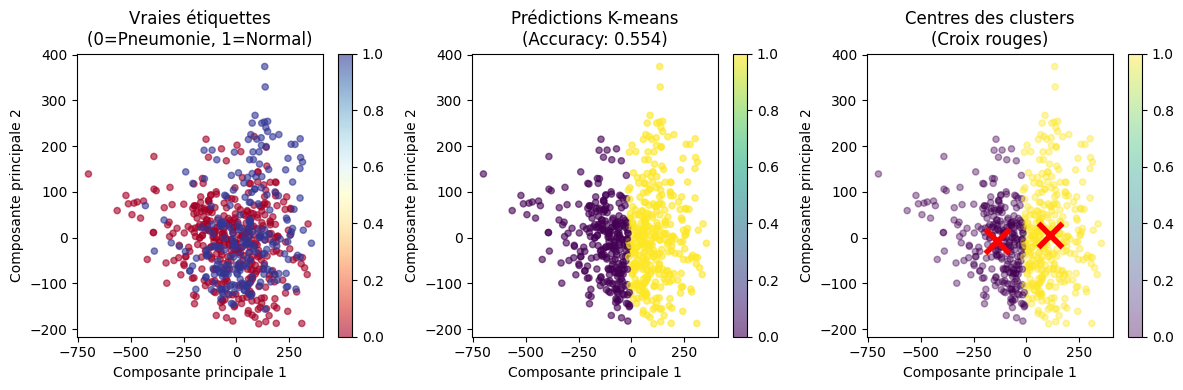

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Charger et prétraiter les images
def load_and_preprocess_images(folder_path, target_size=(300, 300)):
    image_array = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpeg"):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path).convert('L')  # Convertir en niveaux de gris
            img_resize = img.resize(target_size)
            img_array = np.array(img_resize) / 255.0  # Normaliser entre 0 et 1
            image_array.append(img_array)
    return np.array(image_array)

# Charger les images
image_pneumonia_folder = "../pneumonie/train/PNEUMONIA"
image_normal_folder = "../pneumonie/train/NORMAL"

pneumonia_images = load_and_preprocess_images(image_pneumonia_folder)
normal_images = load_and_preprocess_images(image_normal_folder)

# Combiner toutes les images
all_images = np.concatenate((pneumonia_images, normal_images), axis=0)

# Créer les vraies étiquettes (0 = pneumonie, 1 = normal)
true_labels = np.concatenate([
    np.zeros(len(pneumonia_images)),  # 0 pour pneumonie
    np.ones(len(normal_images))       # 1 pour normal
])

# Aplatir les images pour les rendre compatibles avec K-means
all_images_flattened = all_images.reshape(all_images.shape[0], -1)

# Normalisation des caractéristiques
scaler = StandardScaler()
all_images_normalized = scaler.fit_transform(all_images_flattened)

# Réduction de la dimensionnalité avec PCA
pca = PCA(n_components=200)
all_images_reduced = pca.fit_transform(all_images_normalized)

# Appliquer K-means
model = KMeans(n_clusters=2, init='k-means++', n_init=20, max_iter=300, random_state=42)
model.fit(all_images_reduced)

# Évaluer le modèle avec accuracy
predicted_labels = model.labels_

# K-means peut assigner les clusters dans n'importe quel ordre, donc on teste les deux mappings possibles
accuracy1 = np.mean(predicted_labels == true_labels)
predicted_labels_flipped = 1 - predicted_labels
accuracy2 = np.mean(predicted_labels_flipped == true_labels)

# Prendre la meilleure accuracy
best_accuracy = max(accuracy1, accuracy2)
print(f"Accuracy Score: {best_accuracy:.4f}")

# Visualisation
plt.figure(figsize=(12, 4))

# Graphique 1: Vraies étiquettes
plt.subplot(1, 3, 1)
scatter1 = plt.scatter(all_images_reduced[:, 0], all_images_reduced[:, 1], 
                      c=true_labels, cmap='RdYlBu', alpha=0.6, s=20)
plt.title("Vraies étiquettes\n(0=Pneumonie, 1=Normal)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter1)

# Graphique 2: Prédictions K-means
plt.subplot(1, 3, 2)
scatter2 = plt.scatter(all_images_reduced[:, 0], all_images_reduced[:, 1], 
                      c=predicted_labels, cmap='viridis', alpha=0.6, s=20)
plt.title(f"Prédictions K-means\n(Accuracy: {best_accuracy:.3f})")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter2)

# Graphique 3: Centres des clusters
plt.subplot(1, 3, 3)
scatter3 = plt.scatter(all_images_reduced[:, 0], all_images_reduced[:, 1], 
                      c=predicted_labels, cmap='viridis', alpha=0.4, s=20)
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=300, linewidths=4)
plt.title("Centres des clusters\n(Croix rouges)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter3)

plt.tight_layout()
plt.show()

/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Use

/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Use

Accuracy Score (3 clusters): 0.4168


/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/tmey/Desktop/repo_spe_IA/T-DEV-810/T-DEV-810-STG_7/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Use

Accuracy Score (3 clusters): 0.4168


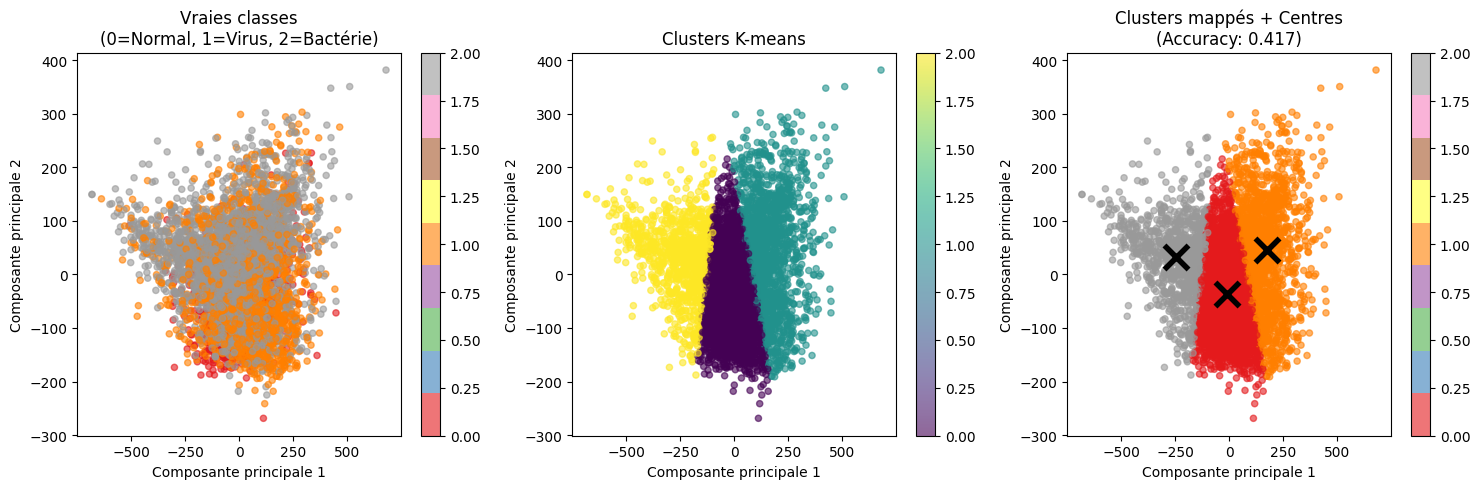

In [25]:
# K-MEANS À 3 CLUSTERS : NORMAL vs PNEUMONIE VIRALE vs PNEUMONIE BACTÉRIENNE

# Charger et prétraiter les images avec distinction virus/bactérie
def load_images_with_subtypes(base_folder):
    all_images = []
    labels = []
    
    # Images normales (label = 0)
    normal_folder = os.path.join(base_folder, "NORMAL")
    for filename in os.listdir(normal_folder):
        if filename.endswith(".jpeg"):
            image_path = os.path.join(normal_folder, filename)
            img = Image.open(image_path).convert('L')
            img_resize = img.resize((300, 300))
            img_array = np.array(img_resize) / 255.0
            all_images.append(img_array)
            labels.append(0)  # Normal
    
    # Images pneumonie avec distinction virus/bactérie
    pneumonia_folder = os.path.join(base_folder, "PNEUMONIA")
    for filename in os.listdir(pneumonia_folder):
        if filename.endswith(".jpeg"):
            image_path = os.path.join(pneumonia_folder, filename)
            img = Image.open(image_path).convert('L')
            img_resize = img.resize((300, 300))
            img_array = np.array(img_resize) / 255.0
            all_images.append(img_array)
            
            # Identifier le type selon le nom du fichier
            if "virus" in filename.lower():
                labels.append(1)  # Pneumonie virale
            elif "bacteria" in filename.lower():
                labels.append(2)  # Pneumonie bactérienne
            else:
                labels.append(1)  # Par défaut virus si pas spécifié
    
    return np.array(all_images), np.array(labels)

# Charger les données avec sous-types
images_3class, true_labels_3class = load_images_with_subtypes("../pneumonie/train")

# Préparation des données
images_flattened_3class = images_3class.reshape(images_3class.shape[0], -1)

# Normalisation
scaler_3class = StandardScaler()
images_normalized_3class = scaler_3class.fit_transform(images_flattened_3class)

# PCA
pca_3class = PCA(n_components=200)
images_reduced_3class = pca_3class.fit_transform(images_normalized_3class)

# K-means à 3 clusters
model_3class = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=300, random_state=42)
model_3class.fit(images_reduced_3class)

predicted_labels_3class = model_3class.labels_

# Évaluation : trouver la meilleure correspondance clusters -> vraies classes
from itertools import permutations

def find_best_mapping(pred_labels, true_labels, n_classes=3):
    best_accuracy = 0
    best_mapping = None
    
    # Tester toutes les permutations possibles
    for perm in permutations(range(n_classes)):
        mapped_predictions = np.array([perm[cluster] for cluster in pred_labels])
        accuracy = np.mean(mapped_predictions == true_labels)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_mapping = perm
    
    return best_accuracy, best_mapping

# Trouver la meilleure correspondance
best_accuracy_3class, best_mapping_3class = find_best_mapping(predicted_labels_3class, true_labels_3class)

print(f"Accuracy Score (3 clusters): {best_accuracy_3class:.4f}")

# Appliquer le meilleur mapping pour l'analyse
mapped_predictions_3class = np.array([best_mapping_3class[cluster] for cluster in predicted_labels_3class])

# Visualisation
plt.figure(figsize=(15, 5))

# Graphique 1: Vraies classes
plt.subplot(1, 3, 1)
scatter1 = plt.scatter(images_reduced_3class[:, 0], images_reduced_3class[:, 1], 
                      c=true_labels_3class, cmap='Set1', alpha=0.6, s=20)
plt.title("Vraies classes\n(0=Normal, 1=Virus, 2=Bactérie)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter1)

# Graphique 2: Clusters K-means
plt.subplot(1, 3, 2)
scatter2 = plt.scatter(images_reduced_3class[:, 0], images_reduced_3class[:, 1], 
                      c=predicted_labels_3class, cmap='viridis', alpha=0.6, s=20)
plt.title(f"Clusters K-means")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter2)

# Graphique 3: Clusters mappés
plt.subplot(1, 3, 3)
scatter3 = plt.scatter(images_reduced_3class[:, 0], images_reduced_3class[:, 1], 
                      c=mapped_predictions_3class, cmap='Set1', alpha=0.6, s=20)
centers_3class = model_3class.cluster_centers_
plt.scatter(centers_3class[:, 0], centers_3class[:, 1], c='black', marker='x', s=300, linewidths=4)
plt.title(f"Clusters mappés + Centres\n(Accuracy: {best_accuracy_3class:.3f})")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(scatter3)

plt.tight_layout()
plt.show()